In [1]:
import pandas   as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
auto_mpg_data = pd.read_csv('C:\\programmer_shit\\data_salo_files\\goshko_csv_files\\auto-mpg.csv')  

auto_mpg_data

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [2]:
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    object 
 8   name    392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


<AxesSubplot:xlabel='mark'>

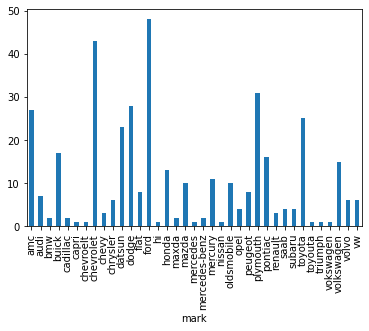

In [48]:

marks = [] 
for i in  auto_mpg_data["name"]:
    marks.append(i.split()[0])

auto_mpg_data["mark"] = marks

marks_frequency = auto_mpg_data.groupby("mark")["mark"].count()
marks_frequency
marks_frequency.plot(kind = "bar")


In [4]:
!pip install textblob

In [49]:


rarely_marks = marks_frequency[marks_frequency < 5]
rarely_marks_list = list(rarely_marks.index)
long_rarely_marks_list = [i for i in rarely_marks_list if len(i) > 3]
text_rarely_marks = " ".join(long_rarely_marks_list)
text_rarely_marks

'cadillac capri chevroelt chevy maxda mercedes mercedes-benz nissan opel renault saab subaru toyouta triumph vokswagen'

In [51]:
often_marks = marks_frequency[marks_frequency >= 5]
often_marks

mark
amc           27
audi           7
buick         17
chevrolet     43
chrysler       6
datsun        23
dodge         28
fiat           8
ford          48
honda         13
mazda         10
mercury       11
oldsmobile    10
peugeot        8
plymouth      31
pontiac       16
toyota        25
volkswagen    15
volvo          6
vw             6
Name: mark, dtype: int64

In [52]:
f_train = open("often_marks.txt" , "w")

marks_frequency_to_train = str(often_marks)
marks_frequency_to_train = marks_frequency_to_train.replace("mark\n" , "")
marks_frequency_to_train = marks_frequency_to_train.replace("\nName: mark, dtype: int64" , '')


f_train.write(marks_frequency_to_train)

f_train.close() 
    

In [54]:
from textblob import TextBlob
 


textBlb = TextBlob(text_rarely_marks)            
textCorrected = textBlb.correct()   
print(textCorrected)
# bad

cadillac carpi chevroelt they made precedes precedes-bent nissan open result scab sugar toyouta triumph vokswagen


In [55]:
from textblob.en import Spelling        


pathToFile = "often_marks.txt"                           # The path we want to store our stats file at
spelling = Spelling(path = pathToFile)                # Connect the path to the Spelling object
spelling.train(pathToFile)


'cadillac capri chevroelt chevy maxda mercedes mercedes-benz nissan opel renault saab subaru toyouta triumph vokswagen'

In [56]:

corrected_marks_dict = {}

for original_mark in long_rarely_marks_list:
    current_corrected_word = spelling.suggest(original_mark)[0][0]
    if original_mark != current_corrected_word:
        corrected_marks_dict[original_mark] = current_corrected_word

        

corrected_marks_dict["mercedes"] = "mercedes-benz"
corrected_marks_dict["vw"] = "volkswagen"
corrected_marks_dict

{'chevroelt': 'chevrolet',
 'maxda': 'mazda',
 'toyouta': 'toyota',
 'vokswagen': 'volkswagen',
 'mercedes': 'mercedes-benz',
 'vw': 'volkswagen'}

In [58]:
auto_mpg_data = auto_mpg_data.replace({'mark': corrected_marks_dict})

In [59]:
auto_mpg_data

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mark
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger,ford


<AxesSubplot:xlabel='mark'>

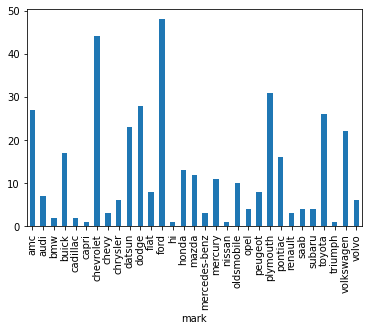

In [60]:
marks_frequency = auto_mpg_data.groupby("mark")["mark"].count()
marks_frequency
marks_frequency.plot(kind = "bar")

In [61]:
auto_mpg_data["origin"].value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

In [67]:
auto_mpg_data["origin"] = auto_mpg_data['origin'].astype('category').cat.codes
auto_mpg_data["mark"] = auto_mpg_data['mark'].astype('category').cat.codes

In [73]:
auto_mpg_data = auto_mpg_data.drop(['name'], axis=1)

In [74]:
auto_mpg_data

,mpg,cyl,displ,hp,weight,accel,yr,origin,mark
0,18.0,8,307.0,130,3504,12.0,70,2,6
1,15.0,8,350.0,165,3693,11.5,70,2,3
2,18.0,8,318.0,150,3436,11.0,70,2,22
3,16.0,8,304.0,150,3433,12.0,70,2,0
4,17.0,8,302.0,140,3449,10.5,70,2,12
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,2,12
388,44.0,4,97.0,52,2130,24.6,82,1,29
389,32.0,4,135.0,84,2295,11.6,82,2,10
390,28.0,4,120.0,79,2625,18.6,82,2,12
